# Shop Data

### Convert Data from .xls to .csv format
### Clean Data

In [1]:
import pandas as pd
import os
import glob

path = r"C:\Users\Bhavin\Desktop\Month\JULY19"
allexcelfiles = glob.glob(os.path.join(path,"*.xls*"))
listofdf = []
for file in allexcelfiles:
    data_xls = pd.read_excel(file, 'Sheet1', index_col=None)
    csv_file = os.path.splitext(file)[0]+".csv"
    data_xls.to_csv(csv_file, encoding='utf-8', index=False)
    df = pd.DataFrame(pd.read_csv(csv_file))
    df.drop(df.iloc[:,5:], axis = 1, inplace = True)
    df.drop("BILL NO", axis = 1, inplace = True)
    df2 = df[['PATICULAR', 'AMOUNT.1']]
    df2.columns = ['PARTICULAR', 'AMOUNT']
    df = df.drop(["PATICULAR", "AMOUNT.1"], 1)
    df = df.append(df2, ignore_index=True)
    df.drop(df[df['PARTICULAR']=='TOTAL'].index, inplace=True)
    df.dropna(inplace=True)
    df['PARTICULAR'] = df['PARTICULAR'].replace(['CURTAINS','SHADNET','CUSHIONS','REXIN','SPOONG','NWTLON','WALL PAPER','RINGS','NETLON / WELCROW'],['CURTAIN','SHADENET','CUSHION','REXINE','FOAM','NETLON','WALLPAPER','RING','NETLON'])
    #df['PARTICULAR'] = df['PARTICULAR'].replace(['SOFA BELT','FABRIC','FABRIC / ADESIVE','CASHMATE','RINGS','TOWEL'],['SOFA MATERIAL','SOFA MATERIAL','SOFA MATERIAL','SOFA MATERIAL','RING','TURKISH'])
    #df.loc[df['PARTICULAR'].str.contains('SLEEPWELL'), 'PARTICULAR'] = 'SLEEPWELL'
    df.loc[df['PARTICULAR'].str.contains('SLEEPWELL|MATTRESS|RES|DR|EST'), 'PARTICULAR'] = 'MATTRESS'
    df.loc[df['PARTICULAR'].str.contains('CUSHION'), 'PARTICULAR'] = 'CUSHION'
    df.loc[df['PARTICULAR'].str.contains('VAS'), 'PARTICULAR'] = 'CANVAS'
    df.loc[df['PARTICULAR'].str.contains('FOAM|SPOONG'), 'PARTICULAR'] = 'FOAM'
    #df.loc[df['PARTICULAR'].str.contains('SPOONG'), 'PARTICULAR'] = 'FOAM'
    df.loc[df['PARTICULAR'].str.contains('TOS'), 'PARTICULAR'] = 'MACKINTOSH'
    df.loc[df['PARTICULAR'].str.contains('CURTAIN'), 'PARTICULAR'] = 'CURTAIN'
    df.loc[df['PARTICULAR'].str.contains('CLOTH'), 'PARTICULAR'] = 'CLOTH'
    df.loc[df['PARTICULAR'].str.contains('PLASTIC'), 'PARTICULAR'] = 'PLASTIC'
    df.loc[df['PARTICULAR'].str.contains('REXINE|MATTY|MATTIE|NYLON'), 'PARTICULAR'] = 'REXINE'
    df.loc[df['PARTICULAR'].str.contains('CHAIN|RUNNER|BAKKAL|BUTTON|RUBBER'), 'PARTICULAR'] = 'BAG MATERIAL'
    df.loc[df['PARTICULAR'].str.contains('VELVET'), 'PARTICULAR'] = 'VELVET'
    df.loc[df['PARTICULAR'].str.contains('CHATTI'), 'PARTICULAR'] = 'CHATTAI'
    df.loc[df['PARTICULAR'].str.contains('BLINDS|ROLLER|VERTICAL'), 'PARTICULAR'] = 'BLINDS'
    #df.loc[df['PARTICULAR'].str.contains('ROLLER'), 'PARTICULAR'] = 'BLINDS'
    df.loc[df['PARTICULAR'].str.contains('ASTER'), 'PARTICULAR'] = 'ASTAR'
    df.loc[df['PARTICULAR'].str.contains('NIW'), 'PARTICULAR'] = 'NIWAR'
    df.loc[df['PARTICULAR'].str.contains('SIVE'), 'PARTICULAR'] = 'ADHESIVE'
    df.loc[df['PARTICULAR'].str.contains('SHEET'), 'PARTICULAR'] = 'BEDSHEET'
    df.loc[df['PARTICULAR'].str.contains('AIR|PILLOW'), 'PARTICULAR'] = 'PILLOW'
    df.loc[df['PARTICULAR'].str.contains('NAP'), 'PARTICULAR'] = 'NAPKIN'
    #df.loc[df['PARTICULAR'].str.contains('RES|DR|EST'), 'PARTICULAR'] = 'MATTRESS'
    #df.loc[df['PARTICULAR'].str.contains('DR.'), 'PARTICULAR'] = 'MATTRESS'
    #df.loc[df['PARTICULAR'].str.contains('EST'), 'PARTICULAR'] = 'MATTRESS'
    df.loc[df['PARTICULAR'].str.contains('COVER'), 'PARTICULAR'] = 'COVER'
    df.loc[df['PARTICULAR'].str.contains('SET|BACK|PATTI'), 'PARTICULAR'] = 'SOFA SET'
    df.loc[df['PARTICULAR'].str.contains('DIAMOND|BELT|FABRIC|CASHMATE|SOFA$'),'PARTICULAR']='SOFA MATERIAL'
    df.loc[df['PARTICULAR'].str.contains('TOWEL|TURKISH'),'PARTICULAR']='TURKISH CLOTH'
    #print(df)
    
    listofdf.append(df)

In [ ]:
listofdf

In [2]:
megadf = pd.concat(listofdf)
megadf

,PARTICULAR,AMOUNT
0,FOAM,70.0
1,HANDLOOM,800.0
2,CUSHION,200.0
3,CANVAS,200.0
4,PLASTIC,470.0
...,...,...
31,MATTRESS,15250.0
32,CURTAIN,1040.0
33,COVER,350.0
34,NETLON,1900.0


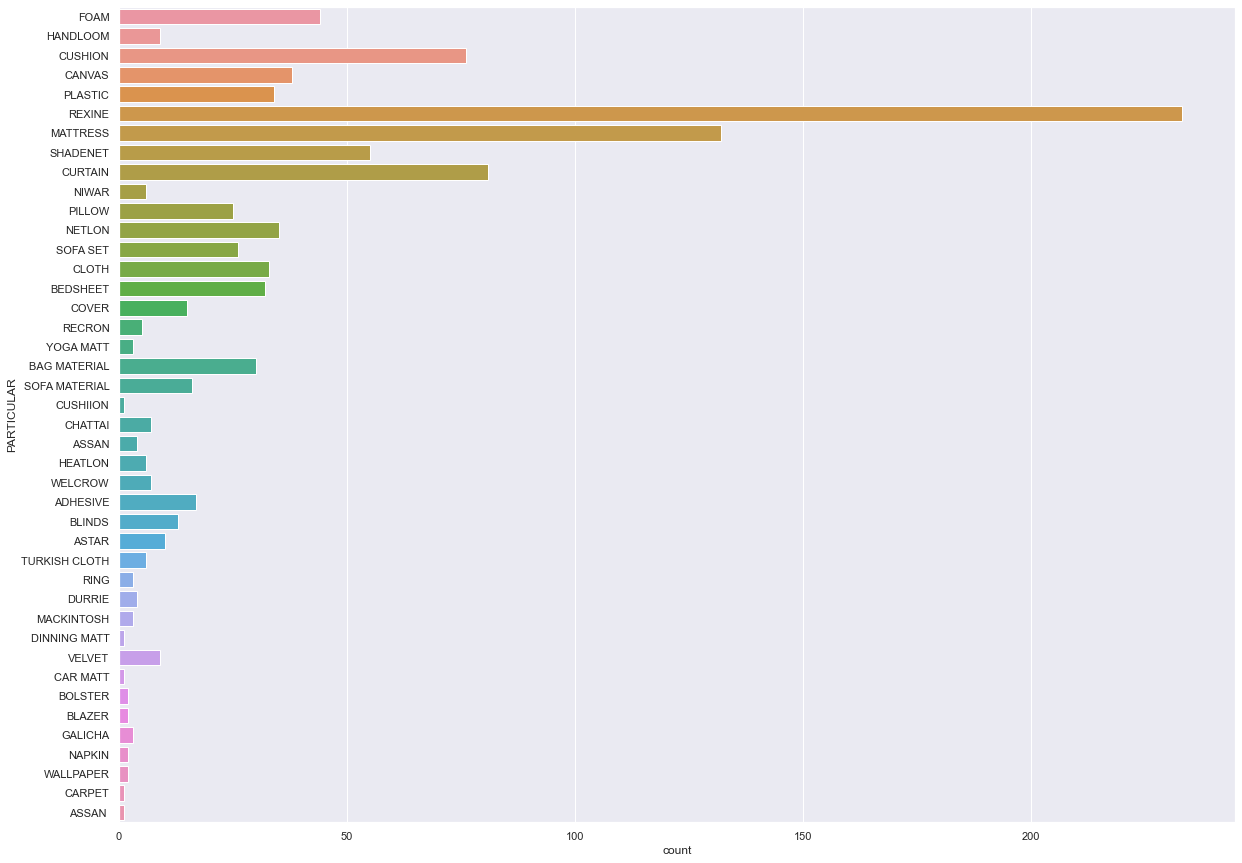

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(y = 'PARTICULAR', data = megadf)
plt.show()

In [ ]:
# step 5: To plot all data

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})

for i in range(len(listofdf)):
    plt.figure(i)
    sns.barplot(y = 'PARTICULAR', x = 'AMOUNT', data = listofdf[i], estimator=sum, ci=None)
    #sns.countplot(y ='PARTICULAR', data = megadf[i])
    plt.show()
#sns.countplot(y ='PARTICULAR', data = megadf[i])
    
#print(megadf[i].describe())